#### Question 1
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply the classification task. To do so:  

* Provide the functional form of the predictive model for each algorithm.
* Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.
* Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models using Boxplot.
* Select the best classifier and elaborate on its advantages and limitations.

Data Set Information : 

* URL : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### Imports

In [86]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
import warnings
from sklearn.naive_bayes import GaussianNB

In [87]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Options
SVC, GNB, Dicesiontree

In [88]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [89]:
len(df.columns), len(df)

(14, 303)

In [90]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
X = df.drop("output", axis=1)
y = df["output"]

In [92]:
y.value_counts()

1    165
0    138
Name: output, dtype: int64

In [93]:
clfs = {
    "RF" : RandomForestClassifier(),
    "DT" : DecisionTreeClassifier(),
    "SVC" : SVC()
}

In [94]:
# Method to Run Iterations
clf_acc = {}
clf_store = {}
clf_y_test = {}
clf_y_preds = {}
ens_bg_clf = False
ens_bo_clf = False
ens_st_clf = False
def run_models(X, y , split_size, mc_run_limit, ens_bg_clf, ens_bo_clf, ens_st_clf, cv_val = None, base_learners = None, final_estimator = None):
    for key in clfs:
        for i in range(mc_run_limit):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split_size)
                if ens_bg_clf:
                    dt = BaggingClassifier(base_estimator = clf, n_estimators = i, max_samples = 0.8, max_features= 0.8)
                elif ens_bo_clf:
                    dt = AdaBoostClassifier(base_estimator = clf, n_estimators = i)
                elif ens_st_clf:
                    dt = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv = cv_val)
                else:    
                    dt = clf.fit(X_train,y_train)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc[key] = accuracy
        clf_store[key] = dt
        clf_y_test[key] = y_test
        clf_y_preds[key] = y_preds

In [95]:
# Training size 20%, MC runs 100

run_models(X, y, 0.2, 100, False, False, False)

In [96]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.753086,0.707819,0.477366


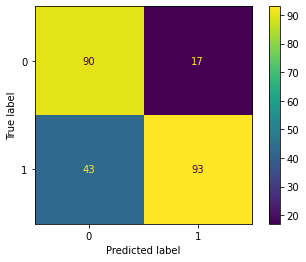

In [97]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test["RF"], y_pred= clf_y_preds["RF"]);

In [98]:
# Training size 50%, MC runs 100
run_models(X, y, 0.5, 100, False, False, False)

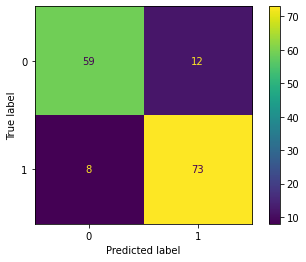

In [99]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test["RF"], y_pred= clf_y_preds["RF"]);

In [100]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.868421,0.756579,0.605263


In [101]:
# Ensamble Bagging for 100 MC runs
run_models(X, y, 0.2, 100, True, False, False)


In [102]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.938272,0.880658,0.62963


In [103]:
run_models(X, y, 0.2, 100, False, True, False)

In [104]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.934156,0.860082,0.621399


In [105]:
base_learners = [
                 ('cf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('cf_2', DecisionTreeClassifier()),             
                 ('cf_3', SVC())             
                ]
final_estimator = LogisticRegression()

In [106]:
run_models(X, y, 0.2, 100, False, False, True, 5, base_learners, final_estimator)

In [107]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.921811,0.876543,0.63786
